In [1]:
from datetime import datetime
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # sets up pretty plots
%matplotlib inline
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_pickle('clean_data.pkl')

In [3]:
df['Users'].value_counts(dropna=False)

Commercial                        768
Government                        337
Military                          257
Civil                             128
Government/Commercial             114
Military/Commercial                69
Military/Government                31
Government/Civil                   25
Military/Civil                      2
Commercial/Government/Military      1
Name: Users, dtype: int64

In [4]:
df['CountryofOwner'].value_counts(dropna=False)

USA                     780
China                   203
Russia                  139
Multinational           115
Japan                    65
India                    50
United Kingdom           44
ESA                      38
Canada                   33
Germany                  26
Luxembourg               18
Spain                    13
Israel                   12
Brazil                   12
France                   12
Netherlands              11
Argentina                11
Italy                    11
South Korea              11
Saudi Arabia             11
Australia                 9
Turkey                    9
Indonesia                 8
Singapore                 8
Norway                    8
United Arab Emirates      7
Thailand                  5
Kazakhstan                5
Algeria                   4
Malaysia                  4
Nigeria                   4
Mexico                    4
Vietnam                   3
South Africa              3
Taiwan                    2
Chile               

In [5]:
df['Purpose'].value_counts(dropna=False)

Communications              725
Earth Observation           580
Technology Development      179
Navigation                  108
Space Science                65
Multipurpose                 31
Earth Science                22
Technology Demonstration     13
Space Observation             9
Name: Purpose, dtype: int64

In [6]:
df['Purpose'].value_counts()

Communications              725
Earth Observation           580
Technology Development      179
Navigation                  108
Space Science                65
Multipurpose                 31
Earth Science                22
Technology Demonstration     13
Space Observation             9
Name: Purpose, dtype: int64

In [7]:
df.head()

,Name,RegistryCountry,CountryofOwner,Operator/Owner,Users,Purpose,ClassofOrbit,TypeofOrbit,Longitude of GEO (degrees),Perigee(km),Apogee(km),Eccentricity,Inclination(degrees),Period(minutes),LaunchMass(kg),DryMass(kg),Power(W),DateofLaunch,ExpectedLifetime,Contractor,CountryofContractor,LaunchSite,LaunchVehicle,COSPAR#,NORAD#
0,Aalto-1,NR (10/17),Finland,University of Aalto,Civil,Technology Development,LEO,NaN,0.00,497,517,0.001454,97.45,94.7,4.5,NaN,4.5,2017-06-23,2 yrs.,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
1,AAUSat-4,NR (12/16),Denmark,University of Aalborg,Civil,Earth Observation,LEO,Sun-Synchronous,0.00,442,687,0.017665,98.20,95.9,1,NaN,NaN,2016-04-25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460
2,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,75.00,35778,35793,0.000178,0.08,1436.03,6330,NaN,16000,2014-02-06,15 yrs.,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
3,ABS-2A,NR (12/16),Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,-75.00,35700,35700,0.000000,0.00,1436.1,1800,NaN,NaN,2016-06-15,15 yrs.,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588
4,"ABS-3 (Agila 2, Mabuhay 1)",Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,146.06,35769,35802,0.000391,0.05,1436.07,3775,1800,9000,1997-08-19,15 yrs.,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901


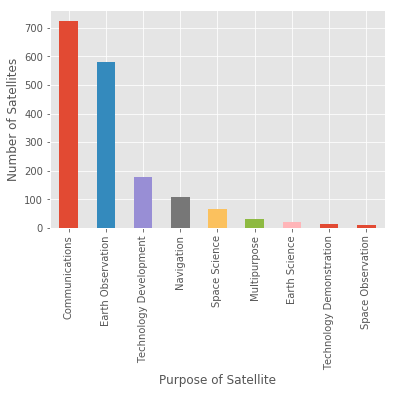

In [8]:
df['Purpose'].value_counts().plot(kind='bar')
plt.xlabel('Purpose of Satellite')
plt.ylabel('Number of Satellites')
plt.show()

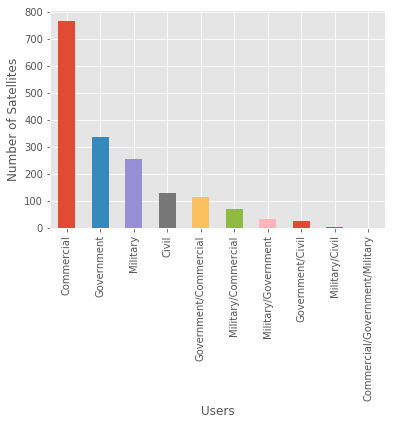

In [9]:
df['Users'].value_counts().plot(kind='bar')
plt.xlabel('Users')
plt.ylabel('Number of Satellites')

plt.show()

In [40]:
df['Users'].value_counts()

Commercial                        768
Government                        337
Military                          257
Civil                             128
Government/Commercial             114
Military/Commercial                69
Military/Government                31
Government/Civil                   25
Military/Civil                      2
Commercial/Government/Military      1
Name: Users, dtype: int64

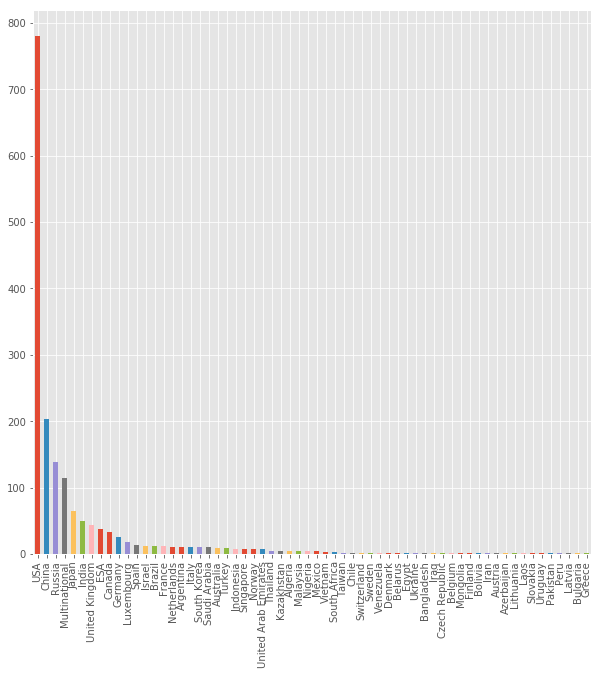

In [10]:
df['CountryofOwner'].value_counts().plot(kind='bar', figsize=(10,10))
plt.show()

In [11]:
countries = df['CountryofOwner'].value_counts()
countries['Rest of world'] = 0

In [12]:
for x in countries:
    if x <= 11:
        countries['Rest of world'] += x

In [13]:
df['CountryofOwner'].value_counts()

USA                     780
China                   203
Russia                  139
Multinational           115
Japan                    65
India                    50
United Kingdom           44
ESA                      38
Canada                   33
Germany                  26
Luxembourg               18
Spain                    13
Israel                   12
Brazil                   12
France                   12
Netherlands              11
Argentina                11
Italy                    11
South Korea              11
Saudi Arabia             11
Australia                 9
Turkey                    9
Indonesia                 8
Singapore                 8
Norway                    8
United Arab Emirates      7
Thailand                  5
Kazakhstan                5
Algeria                   4
Malaysia                  4
Nigeria                   4
Mexico                    4
Vietnam                   3
South Africa              3
Taiwan                    2
Chile               

In [14]:
drop_list = ['Netherlands','Italy','Saudi Arabia','Argentina','South Korea','Turkey', 'Australia','Norway','Indonesia','Singapore', 'United Arab Emirates','Kazakhstan', 'Thailand', 'Malaysia', 'Algeria', 'Nigeria', 'Mexico', 'Vietnam', 'South Africa', 'Switzerland', 'Venezuela', 'Taiwan', 'Sweden', 'Egypt', 'Chile', 'Belarus', 'Denmark', 'Czech Republic', 'Mongolia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Slovakia', 'Lithuania', 'Finland', 'Pakistan', 'Iran', 'Iraq', 'Latvia', 'Belgium', 'Uruguay', 'Laos', 'Bulgaria', 'Bolivia', 'Greece', 'Ukraine','Peru']
countries.drop(labels = drop_list, inplace = True)

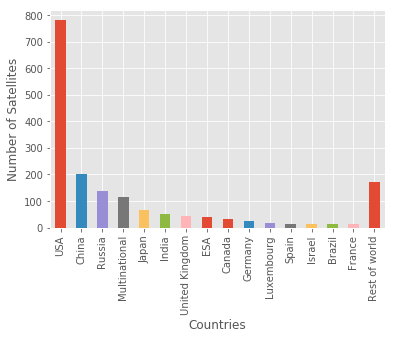

In [15]:
countries.plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Number of Satellites')
plt.show()

In [16]:
df.head()

,Name,RegistryCountry,CountryofOwner,Operator/Owner,Users,Purpose,ClassofOrbit,TypeofOrbit,Longitude of GEO (degrees),Perigee(km),Apogee(km),Eccentricity,Inclination(degrees),Period(minutes),LaunchMass(kg),DryMass(kg),Power(W),DateofLaunch,ExpectedLifetime,Contractor,CountryofContractor,LaunchSite,LaunchVehicle,COSPAR#,NORAD#
0,Aalto-1,NR (10/17),Finland,University of Aalto,Civil,Technology Development,LEO,NaN,0.00,497,517,0.001454,97.45,94.7,4.5,NaN,4.5,2017-06-23,2 yrs.,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
1,AAUSat-4,NR (12/16),Denmark,University of Aalborg,Civil,Earth Observation,LEO,Sun-Synchronous,0.00,442,687,0.017665,98.20,95.9,1,NaN,NaN,2016-04-25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460
2,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,75.00,35778,35793,0.000178,0.08,1436.03,6330,NaN,16000,2014-02-06,15 yrs.,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
3,ABS-2A,NR (12/16),Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,-75.00,35700,35700,0.000000,0.00,1436.1,1800,NaN,NaN,2016-06-15,15 yrs.,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588
4,"ABS-3 (Agila 2, Mabuhay 1)",Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,146.06,35769,35802,0.000391,0.05,1436.07,3775,1800,9000,1997-08-19,15 yrs.,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901


In [23]:
df['DateofLaunch'].value_counts()

2017-02-14    90
2017-07-14    69
2014-06-19    31
2017-06-23    27
2015-09-19    20
2016-06-22    20
2017-02-15    16
2015-10-08    14
2013-11-21    13
2015-12-22    11
2017-06-25    10
2017-01-14    10
2017-04-18     9
1997-12-23     8
2016-05-17     8
2016-11-11     8
2016-06-01     8
2017-05-18     8
2016-12-15     8
2013-12-06     7
1998-08-02     7
2012-09-13     7
2014-07-08     7
2011-12-17     7
2016-09-26     7
1998-04-07     6
2016-09-16     6
2013-02-06     6
2016-12-21     6
2004-06-29     6
2015-09-28     6
2015-12-16     6
2017-05-26     6
2010-10-19     6
2011-12-28     6
2011-07-13     6
2015-01-31     6
2016-09-15     6
1999-12-04     6
2009-07-29     6
2007-04-17     6
2014-11-06     5
2008-08-29     5
2009-02-11     5
2014-05-24     5
2016-12-09     5
2017-06-22     5
2013-06-25     5
2014-06-30     5
2011-08-17     5
2002-02-11     5
2015-10-07     5
2008-04-28     5
2015-05-20     5
2006-04-15     5
2013-02-25     5
1998-02-18     5
2008-05-23     4
2014-07-14    

In [18]:
df['DateofLaunch'].dt.year.value_counts()

2017    309
2016    169
2015    154
2014    146
2013    110
2011     87
2012     85
2010     72
2009     67
2008     60
2007     58
1998     56
1997     47
2006     45
2002     43
1999     36
2000     35
2005     34
2003     33
2004     31
2001     22
1996     11
1995      8
1994      4
1993      3
1990      2
1992      1
1991      1
1989      1
1988      1
1974      1
Name: DateofLaunch, dtype: int64

Text(0,0.5,'Number of Satellites')

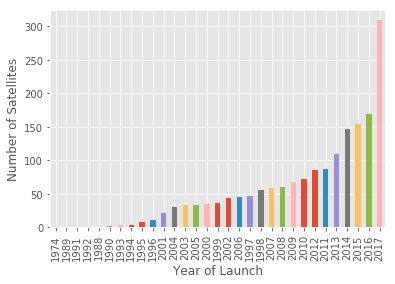

In [19]:
df['DateofLaunch'].dt.year.value_counts().sort_values().plot(kind='bar')
plt.xlabel('Year of Launch')
plt.ylabel('Number of Satellites')

In [20]:
df.head()

,Name,RegistryCountry,CountryofOwner,Operator/Owner,Users,Purpose,ClassofOrbit,TypeofOrbit,Longitude of GEO (degrees),Perigee(km),Apogee(km),Eccentricity,Inclination(degrees),Period(minutes),LaunchMass(kg),DryMass(kg),Power(W),DateofLaunch,ExpectedLifetime,Contractor,CountryofContractor,LaunchSite,LaunchVehicle,COSPAR#,NORAD#
0,Aalto-1,NR (10/17),Finland,University of Aalto,Civil,Technology Development,LEO,NaN,0.00,497,517,0.001454,97.45,94.7,4.5,NaN,4.5,2017-06-23,2 yrs.,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
1,AAUSat-4,NR (12/16),Denmark,University of Aalborg,Civil,Earth Observation,LEO,Sun-Synchronous,0.00,442,687,0.017665,98.20,95.9,1,NaN,NaN,2016-04-25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460
2,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,75.00,35778,35793,0.000178,0.08,1436.03,6330,NaN,16000,2014-02-06,15 yrs.,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
3,ABS-2A,NR (12/16),Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,-75.00,35700,35700,0.000000,0.00,1436.1,1800,NaN,NaN,2016-06-15,15 yrs.,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588
4,"ABS-3 (Agila 2, Mabuhay 1)",Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,146.06,35769,35802,0.000391,0.05,1436.07,3775,1800,9000,1997-08-19,15 yrs.,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901


In [21]:
df['ClassofOrbit'].value_counts()

LEO           1065
GEO            531
MEO             97
Elliptical      39
Name: ClassofOrbit, dtype: int64

Text(0,0.5,'Number of Stellites')

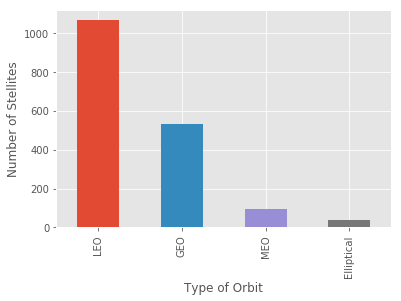

In [22]:
df['ClassofOrbit'].value_counts().plot('bar')
plt.xlabel('Type of Orbit')
plt.ylabel('Number of Stellites')

In [24]:
total = countries
purpose = df['Purpose'].value_counts()

In [25]:
df2 = df[['CountryofOwner','Purpose']].groupby(["CountryofOwner", 'Purpose'])['CountryofOwner'].count().unstack('Purpose').fillna(0)

Text(0,0.5,'Number of Satellites')

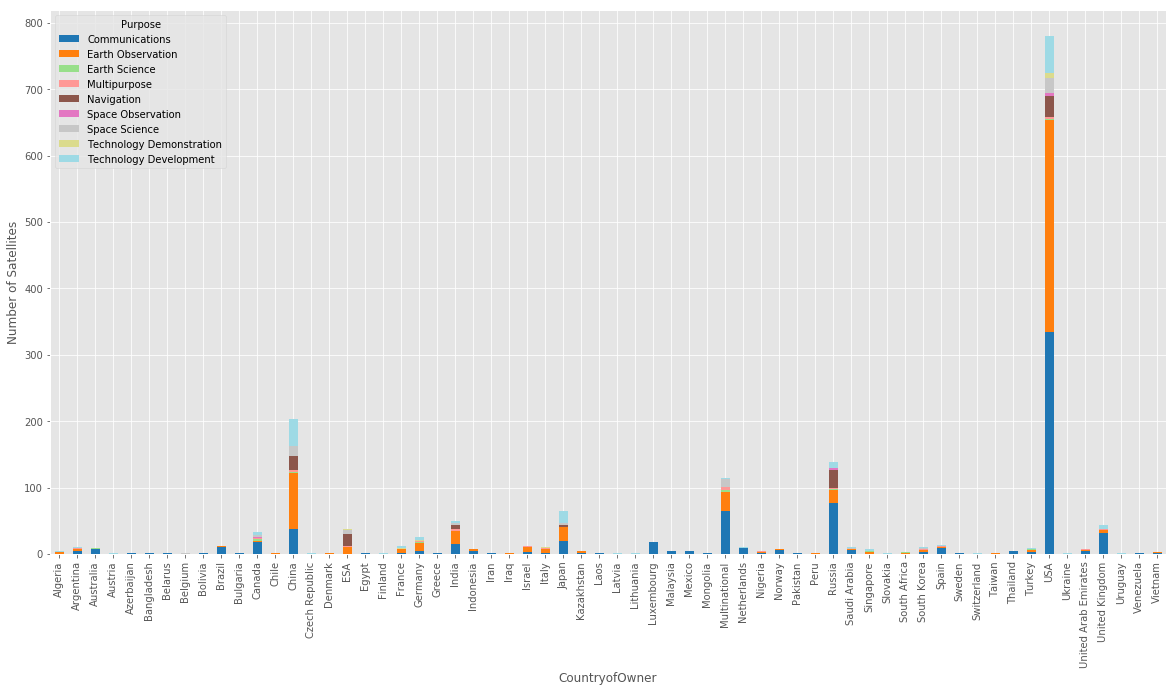

In [26]:
df2.plot(kind = 'bar', stacked = True, figsize=(20, 10),colormap='tab20')
plt.ylabel('Number of Satellites')

In [27]:
df[['CountryofOwner','Purpose']].groupby(["CountryofOwner", 'Purpose'])['CountryofOwner'].count().unstack('Purpose')

Purpose,Communications,Earth Observation,Earth Science,Multipurpose,Navigation,Space Observation,Space Science,Technology Demonstration,Technology Development
CountryofOwner,,,,,,,,,
Algeria,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Argentina,4.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0
Australia,7.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Azerbaijan,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bangladesh,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belarus,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Bolivia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.head()

,Name,RegistryCountry,CountryofOwner,Operator/Owner,Users,Purpose,ClassofOrbit,TypeofOrbit,Longitude of GEO (degrees),Perigee(km),Apogee(km),Eccentricity,Inclination(degrees),Period(minutes),LaunchMass(kg),DryMass(kg),Power(W),DateofLaunch,ExpectedLifetime,Contractor,CountryofContractor,LaunchSite,LaunchVehicle,COSPAR#,NORAD#
0,Aalto-1,NR (10/17),Finland,University of Aalto,Civil,Technology Development,LEO,NaN,0.00,497,517,0.001454,97.45,94.7,4.5,NaN,4.5,2017-06-23,2 yrs.,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
1,AAUSat-4,NR (12/16),Denmark,University of Aalborg,Civil,Earth Observation,LEO,Sun-Synchronous,0.00,442,687,0.017665,98.20,95.9,1,NaN,NaN,2016-04-25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460
2,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,75.00,35778,35793,0.000178,0.08,1436.03,6330,NaN,16000,2014-02-06,15 yrs.,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
3,ABS-2A,NR (12/16),Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,-75.00,35700,35700,0.000000,0.00,1436.1,1800,NaN,NaN,2016-06-15,15 yrs.,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588
4,"ABS-3 (Agila 2, Mabuhay 1)",Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,146.06,35769,35802,0.000391,0.05,1436.07,3775,1800,9000,1997-08-19,15 yrs.,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901


In [29]:
df3 = df[['DateofLaunch','Purpose']].groupby(['Purpose', 'DateofLaunch'])['DateofLaunch'].count().unstack('Purpose').fillna(0)

In [30]:
firsthundred = df3[0:101]

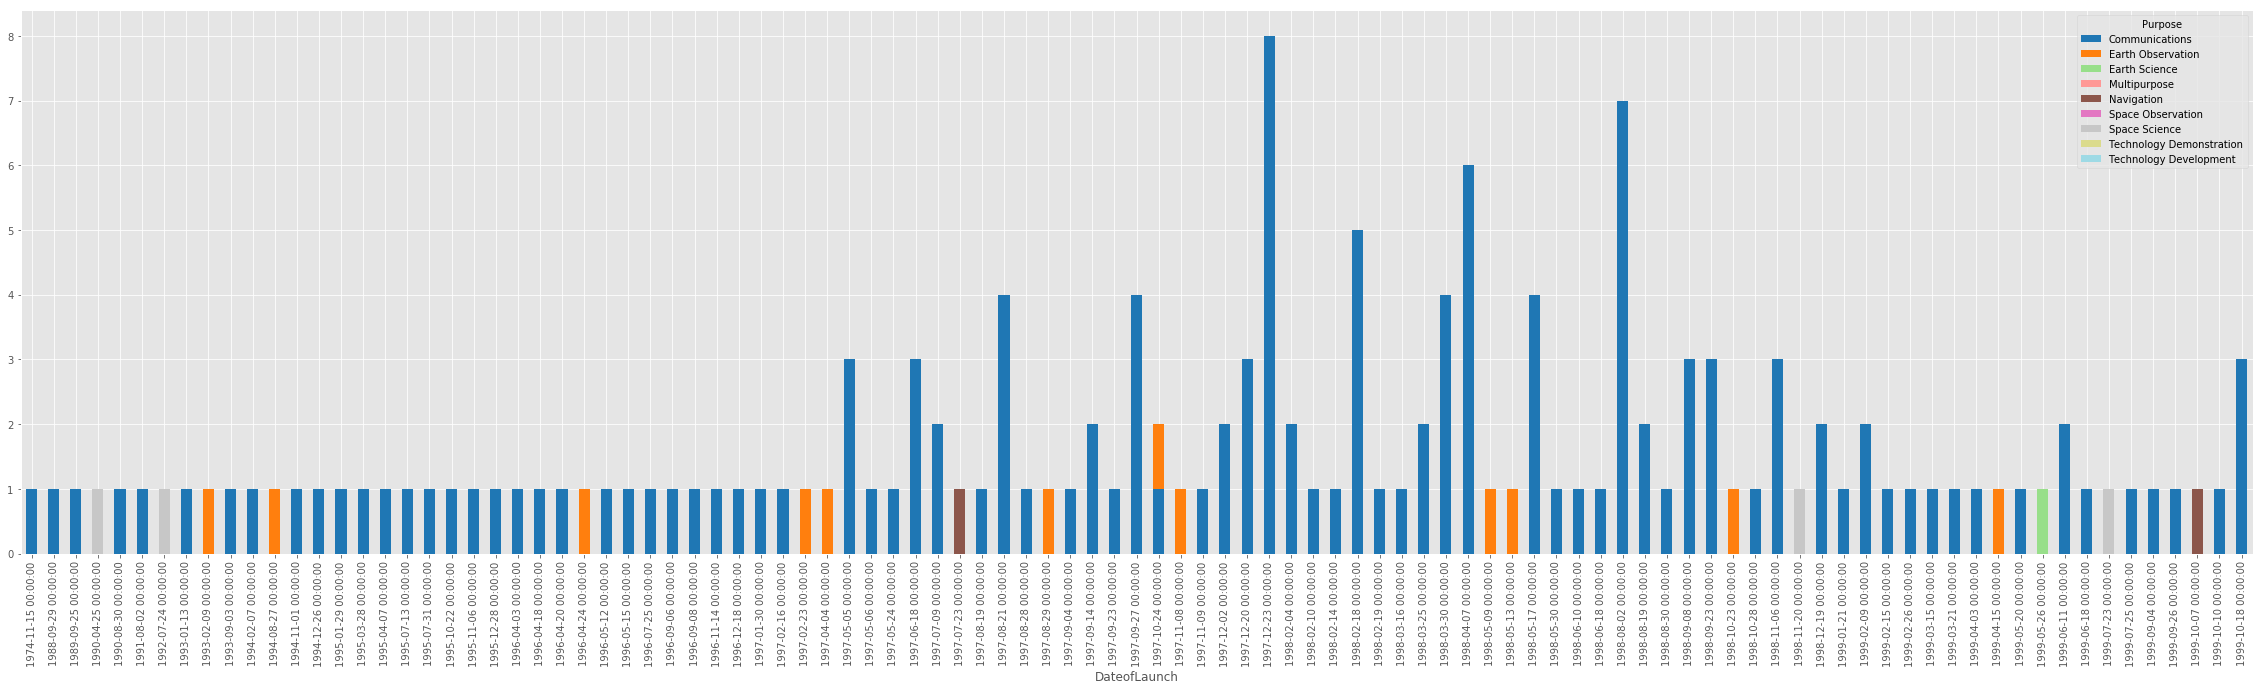

In [31]:
firsthundred.plot(kind = 'bar', stacked = True, figsize=(40, 10),colormap='tab20')

In [32]:
df['year'] = df['DateofLaunch'].dt.year.sort_values()

In [33]:
df4 = df[['year','Purpose']].groupby(['Purpose', 'year'])['year'].count().unstack('Purpose').fillna(0)

Text(0.5,0,'Year')

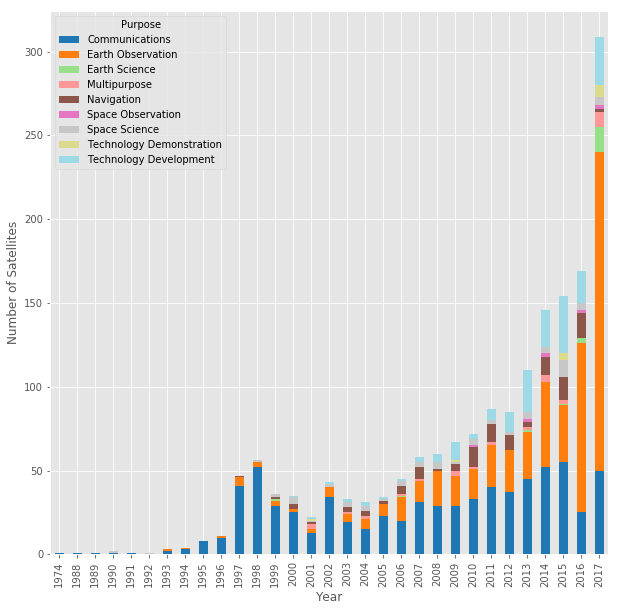

In [34]:
df4.plot(kind = 'bar', stacked = True, figsize=(10, 10), colormap='tab20')
plt.ylabel('Number of Satellites')
plt.xlabel('Year')

In [35]:
df5 = df[['year','Users']].groupby(['Users', 'year'])['year'].count().unstack('Users').fillna(0)

Text(0.5,0,'Year')

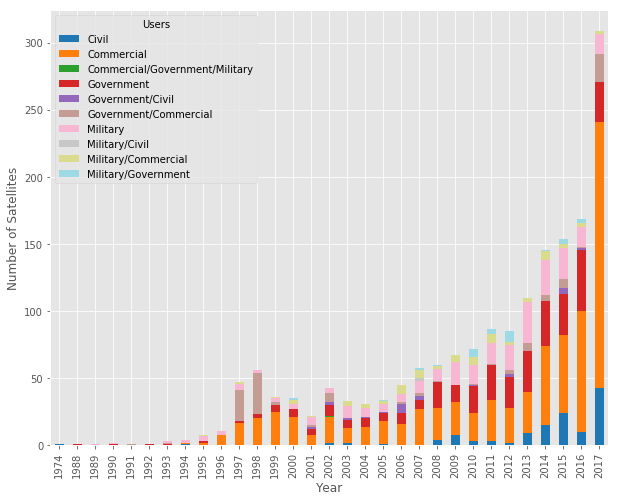

In [36]:
df5.plot(kind = 'bar', stacked = True, figsize=(10, 8), colormap='tab20')
plt.ylabel('Number of Satellites')
plt.xlabel('Year')

In [37]:
df6 = df[['ClassofOrbit','Purpose']].groupby(['Purpose', 'ClassofOrbit'])['ClassofOrbit'].count().unstack('ClassofOrbit').fillna(0)

In [38]:
df6

ClassofOrbit,Elliptical,GEO,LEO,MEO
Purpose,,,,
Communications,10.0,453.0,249.0,13.0
Earth Observation,8.0,39.0,533.0,0.0
Earth Science,0.0,0.0,22.0,0.0
Multipurpose,0.0,5.0,26.0,0.0
Navigation,0.0,24.0,0.0,84.0
Space Observation,0.0,4.0,5.0,0.0
Space Science,18.0,1.0,46.0,0.0
Technology Demonstration,0.0,0.0,13.0,0.0
Technology Development,3.0,5.0,171.0,0.0


Text(0,0.5,'Number of Satellites')

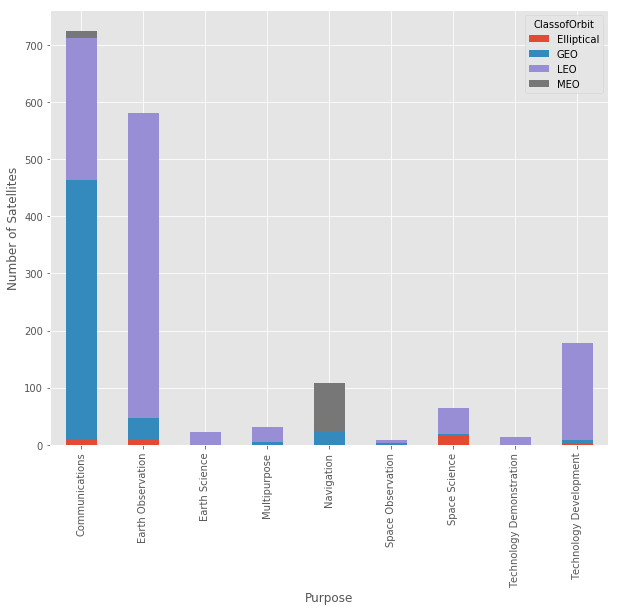

In [39]:
df6.plot(kind = 'bar', stacked = True, figsize=(10, 8))
plt.ylabel('Number of Satellites')